In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Import the daily shelter occupancy stats for the years 2017-2019
df = pd.read_csv('shelter_use_totals_without_families__daily.csv', parse_dates=['Date'])
df.head()

,Date,capacity,occupancy,vacancy
0,2017-01-01,3503,3265,238
1,2017-01-02,3548,3270,278
2,2017-01-03,3577,3268,309
3,2017-01-04,3607,3396,211
4,2017-01-05,3629,3367,262


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1095 non-null   datetime64[ns]
 1   capacity   1095 non-null   int64         
 2   occupancy  1095 non-null   int64         
 3   vacancy    1095 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 34.3 KB


In [4]:
# Reset the index
# df = df.reset_index()
# Change the name of the date field to match what I used in functions below
df.rename(columns={'Date': 'Year_Month_Day', 'occupancy': 'OCCUPANCY' }, inplace=True)
#df.head()

In [5]:
# Set the date as a the index
df.set_index('Year_Month_Day', inplace=True)
df.head()

,capacity,OCCUPANCY,vacancy
Year_Month_Day,,,
2017-01-01,3503,3265,238
2017-01-02,3548,3270,278
2017-01-03,3577,3268,309
2017-01-04,3607,3396,211
2017-01-05,3629,3367,262


In [6]:
# Create a column with a properly formatted date
#import datetime
df['Year_Month_Day']=pd.to_datetime(df['Year_Month_Day'])

KeyError: 'Year_Month_Day'

In [10]:
# *******************************************************
# Add weather data
dfw17 = pd.read_csv('en_climate_daily_ON_6158355_2017_P1D.csv', parse_dates=['Date/Time'])
dfw18 = pd.read_csv('en_climate_daily_ON_6158355_2018_P1D.csv', parse_dates=['Date/Time'])
dfw19 = pd.read_csv('en_climate_daily_ON_6158355_2019_P1D.csv', parse_dates=['Date/Time'])

In [11]:
# Concatenate into one dataframe
dfw=pd.concat([dfw17,dfw18,dfw19])
# Clean up missing values - remove them. 
# Remove days with no temp data
#dfw = dfw[dfw.'Max Temp Flag' != 'M']
dfw.drop(dfw.index[dfw['Max Temp Flag'] == 'M'], inplace = True)
dfw.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-79.4,43.67,TORONTO CITY,6158355,2017-01-01,2017,1,1,NaN,3.1,...,NaN,M,0.0,NaN,3.0,NaN,NaN,M,NaN,M
1,-79.4,43.67,TORONTO CITY,6158355,2017-01-02,2017,1,2,NaN,5.5,...,NaN,M,0.0,NaN,3.0,NaN,NaN,M,NaN,M
2,-79.4,43.67,TORONTO CITY,6158355,2017-01-03,2017,1,3,NaN,4.8,...,NaN,M,11.3,NaN,1.0,NaN,NaN,M,NaN,M
3,-79.4,43.67,TORONTO CITY,6158355,2017-01-04,2017,1,4,NaN,3.8,...,NaN,M,0.6,NaN,NaN,NaN,NaN,M,NaN,M
4,-79.4,43.67,TORONTO CITY,6158355,2017-01-05,2017,1,5,NaN,-5.3,...,NaN,M,0.0,NaN,NaN,NaN,NaN,M,NaN,M


In [12]:
# Drop empty columns
dfw.drop(['Data Quality', 'Max Temp Flag', 'Min Temp Flag', 'Mean Temp Flag', 'Heat Deg Days Flag', 'Cool Deg Days Flag', 'Total Rain (mm)','Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag', 'Total Precip Flag', 'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'], axis = 1) 

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust Flag
0,-79.4,43.67,TORONTO CITY,6158355,2017-01-01,2017,1,1,3.1,-0.5,1.3,16.7,0.0,0.0,3.0,M
1,-79.4,43.67,TORONTO CITY,6158355,2017-01-02,2017,1,2,5.5,0.7,3.1,14.9,0.0,0.0,3.0,M
2,-79.4,43.67,TORONTO CITY,6158355,2017-01-03,2017,1,3,4.8,2.4,3.6,14.4,0.0,11.3,1.0,M
3,-79.4,43.67,TORONTO CITY,6158355,2017-01-04,2017,1,4,3.8,-7.6,-1.9,19.9,0.0,0.6,NaN,M
4,-79.4,43.67,TORONTO CITY,6158355,2017-01-05,2017,1,5,-5.3,-10.3,-7.8,25.8,0.0,0.0,NaN,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-79.4,43.67,TORONTO CITY,6158355,2019-12-27,2019,12,27,11.6,3.8,7.7,10.3,0.0,0.0,0.0,M
361,-79.4,43.67,TORONTO CITY,6158355,2019-12-28,2019,12,28,4.5,2.8,3.7,14.3,0.0,0.0,1.0,M
362,-79.4,43.67,TORONTO CITY,6158355,2019-12-29,2019,12,29,3.4,1.2,2.3,15.7,0.0,6.9,1.0,M
363,-79.4,43.67,TORONTO CITY,6158355,2019-12-30,2019,12,30,9.0,1.4,5.2,12.8,0.0,10.3,NaN,M


In [14]:
# In preparaton for combining the data, set the a proper date column.
#dfw['Year_Month_Day']=pd.to_datetime(dfw['Date/Time'])

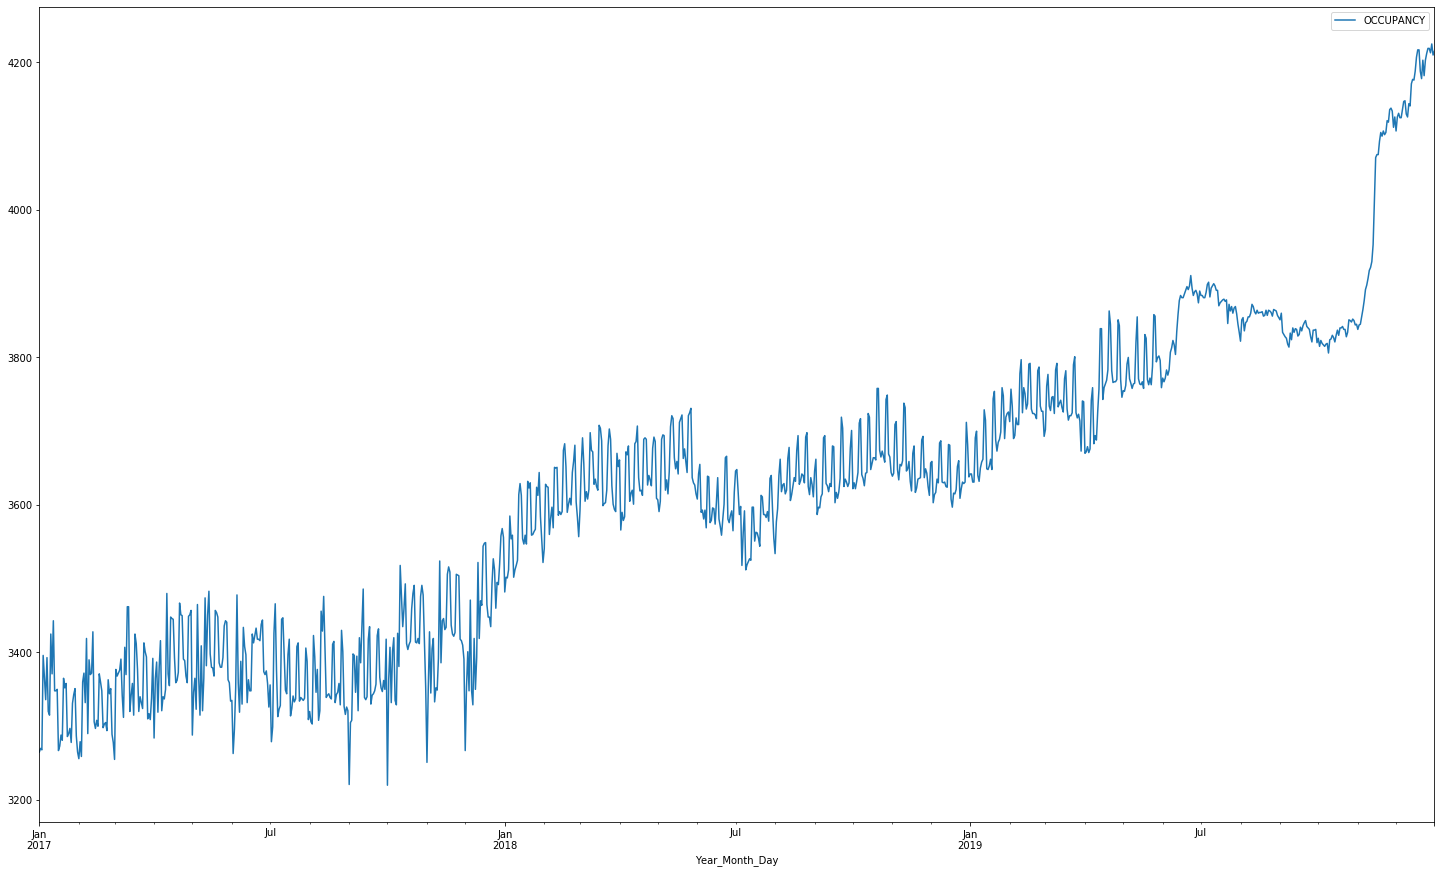

In [13]:
# Plot Occupancy
ax = df.reset_index().plot(x='Year_Month_Day', y='OCCUPANCY', figsize=(25,15))
ax

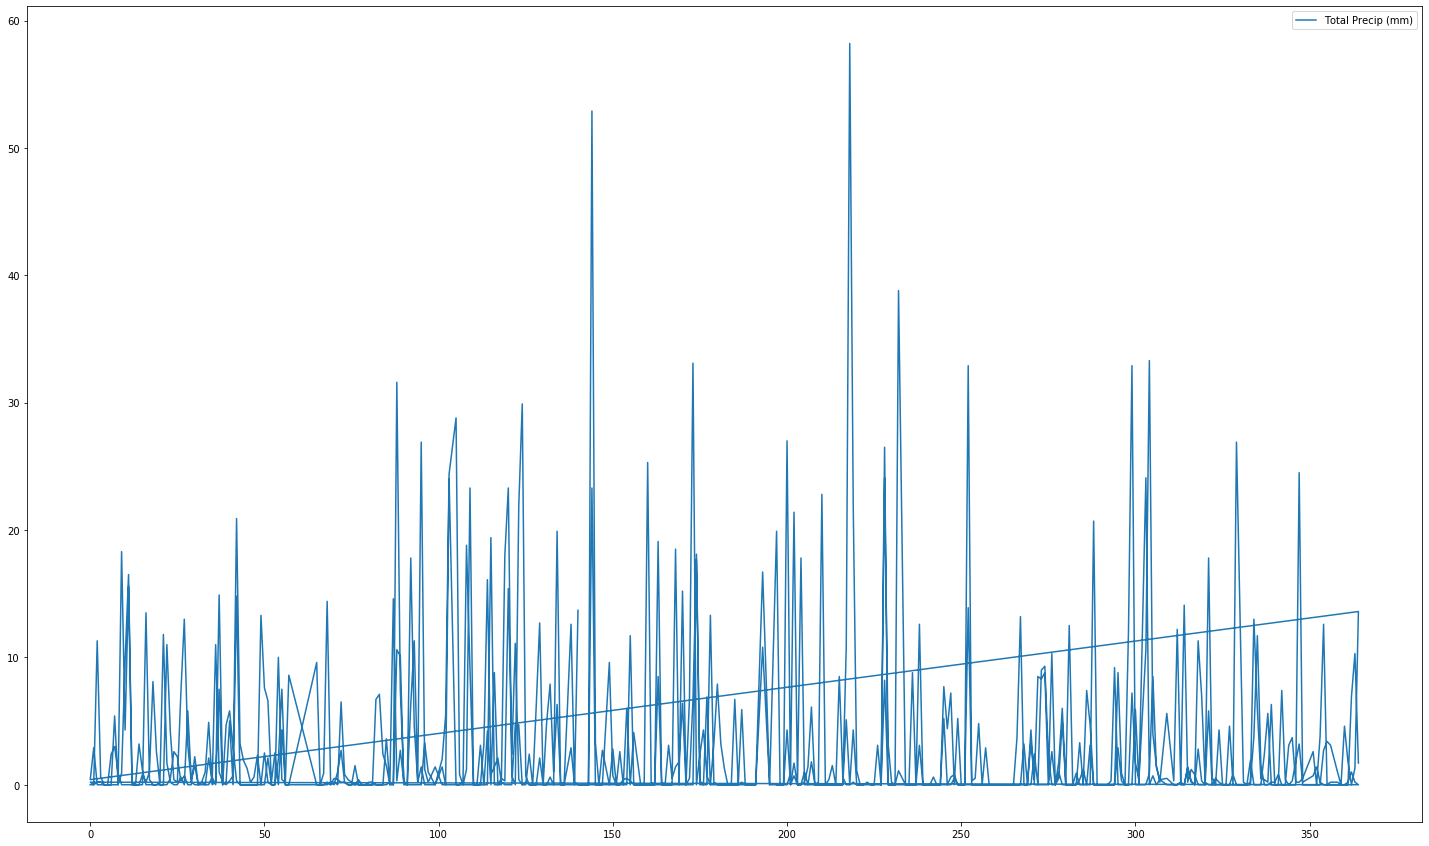

In [14]:
# Long term growth trend, some seasonality seems apparent.
#********************
# Now plot precipitation
axw = dfw.plot(y='Total Precip (mm)', figsize=(25,15))

In [15]:
dfw.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-79.4,43.67,TORONTO CITY,6158355,2017-01-01,2017,1,1,NaN,3.1,...,NaN,M,0.0,NaN,3.0,NaN,NaN,M,NaN,M
1,-79.4,43.67,TORONTO CITY,6158355,2017-01-02,2017,1,2,NaN,5.5,...,NaN,M,0.0,NaN,3.0,NaN,NaN,M,NaN,M
2,-79.4,43.67,TORONTO CITY,6158355,2017-01-03,2017,1,3,NaN,4.8,...,NaN,M,11.3,NaN,1.0,NaN,NaN,M,NaN,M
3,-79.4,43.67,TORONTO CITY,6158355,2017-01-04,2017,1,4,NaN,3.8,...,NaN,M,0.6,NaN,NaN,NaN,NaN,M,NaN,M
4,-79.4,43.67,TORONTO CITY,6158355,2017-01-05,2017,1,5,NaN,-5.3,...,NaN,M,0.0,NaN,NaN,NaN,NaN,M,NaN,M


In [16]:
# In preparation for statistical analysis, merge the Weather & Shelter data
dfw.set_index('Date/Time', inplace=True)

In [72]:
#df.head()

In [73]:
#df.info()

In [70]:
#dfw.head()

In [71]:
#dfw.info()

In [21]:
df.index.dtype,dfw.index.dtype

(dtype('<M8[ns]'), dtype('<M8[ns]'))

In [22]:
# To run additional analysis, bring the two datasets into a single dataframe
merged_df = pd.concat([df, dfw], axis=1, sort=False)
merged_df.head()

,capacity,OCCUPANCY,vacancy,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
2017-01-01,3503,3265,238,-79.4,43.67,TORONTO CITY,6158355.0,2017.0,1.0,1.0,...,NaN,M,0.0,NaN,3.0,NaN,NaN,M,NaN,M
2017-01-02,3548,3270,278,-79.4,43.67,TORONTO CITY,6158355.0,2017.0,1.0,2.0,...,NaN,M,0.0,NaN,3.0,NaN,NaN,M,NaN,M
2017-01-03,3577,3268,309,-79.4,43.67,TORONTO CITY,6158355.0,2017.0,1.0,3.0,...,NaN,M,11.3,NaN,1.0,NaN,NaN,M,NaN,M
2017-01-04,3607,3396,211,-79.4,43.67,TORONTO CITY,6158355.0,2017.0,1.0,4.0,...,NaN,M,0.6,NaN,NaN,NaN,NaN,M,NaN,M
2017-01-05,3629,3367,262,-79.4,43.67,TORONTO CITY,6158355.0,2017.0,1.0,5.0,...,NaN,M,0.0,NaN,NaN,NaN,NaN,M,NaN,M


In [15]:
#merged_df.set_index('Year_Month_Day', inplace=True)
#merged_df.head()

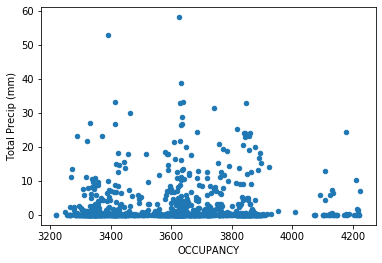

In [23]:
# Scatter plot with Occupancy and Total Precipitation
ax = merged_df.plot.scatter(x='OCCUPANCY', y='Total Precip (mm)')

In [75]:
# Run regression analysis on hypothesis 1 (Precipitation)
# For regression analysis we will use the statsmodels package
import statsmodels.formula.api as sm

In [76]:
# For visual inspection of the regression models
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot

In [77]:
# Let's rename Total Precip(mm) & Min Temp (°C) - it may cause us trouble later
merged_df.rename(columns={'Total Precip (mm)':'TotalPrecipmm', 'Min Temp (°C)':'MinTempCelsius'}, inplace=True)

In [78]:
cm = merged_df.corr(method = 'pearson')

# Print correlation matrix
cm

,capacity,OCCUPANCY,vacancy,Longitude (x),Latitude (y),Climate ID,Year,Month,Day,Data Quality,...,Total Rain (mm),Total Snow (cm),TotalPrecipmm,Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),detrended,deseasoned,y_est,y2_est
capacity,1.000000e+00,9.600173e-01,-5.018454e-01,-6.494116e-15,-9.504516e-15,NaN,8.762745e-01,1.507538e-01,5.265180e-02,NaN,...,NaN,NaN,2.687045e-02,2.079127e-01,NaN,NaN,2.591181e-02,9.640440e-01,2.591181e-02,-2.591181e-02
OCCUPANCY,9.600173e-01,1.000000e+00,-7.239170e-01,-1.510143e-14,1.904776e-15,NaN,8.996592e-01,2.455493e-01,6.546114e-02,NaN,...,NaN,NaN,3.111807e-02,1.586527e-01,NaN,NaN,1.647544e-01,9.958368e-01,1.647544e-01,-1.647544e-01
vacancy,-5.018454e-01,-7.239170e-01,1.000000e+00,-3.307839e-15,1.174912e-14,NaN,-6.202614e-01,-3.871768e-01,-7.250573e-02,NaN,...,NaN,NaN,-2.992859e-02,2.217798e-02,NaN,NaN,-4.413074e-01,-7.011302e-01,-4.413074e-01,4.413074e-01
Longitude (x),-6.494116e-15,-1.510143e-14,-3.307839e-15,1.000000e+00,-1.000000e+00,NaN,0.000000e+00,4.602386e-15,-9.135818e-17,NaN,...,NaN,NaN,1.740271e-16,-2.459928e-17,NaN,NaN,-5.007081e-14,-2.995047e-15,2.022410e-14,7.608793e-15
Latitude (y),-9.504516e-15,1.904776e-15,1.174912e-14,-1.000000e+00,1.000000e+00,NaN,0.000000e+00,7.264655e-16,-6.072887e-19,NaN,...,NaN,NaN,-1.657627e-16,-3.382650e-16,NaN,NaN,5.007071e-14,3.123122e-15,-2.019373e-14,-7.524314e-15
Climate ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,8.762745e-01,8.996592e-01,-6.202614e-01,0.000000e+00,0.000000e+00,NaN,1.000000e+00,-1.092516e-17,4.590478e-19,NaN,...,NaN,NaN,2.828651e-02,1.963750e-01,NaN,NaN,-5.789073e-03,9.035371e-01,-5.789073e-03,5.789073e-03
Month,1.507538e-01,2.455493e-01,-3.871768e-01,4.602386e-15,7.264655e-16,NaN,-1.092516e-17,1.000000e+00,-1.059205e-02,NaN,...,NaN,NaN,-2.526075e-02,-1.988561e-01,NaN,NaN,-2.461896e-03,2.457844e-01,-2.461896e-03,2.461896e-03
Day,5.265180e-02,6.546114e-02,-7.250573e-02,-9.135818e-17,-6.072887e-19,NaN,4.590478e-19,-1.059205e-02,1.000000e+00,NaN,...,NaN,NaN,2.297620e-02,-4.589905e-02,NaN,NaN,6.860823e-02,6.568431e-02,6.860823e-02,-6.860823e-02
Data Quality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
# Calculate the means of x, y

mu_x = merged_df["OCCUPANCY"].mean()
mu_y = merged_df["TotalPrecipmm"].mean()

print(mu_x, mu_y)

3618.611872146119 2.482328767123289


In [80]:
# Calculate the standard deviations of x, y

sig_x = merged_df["OCCUPANCY"].std()
#df1["x"].mean()np.std(x)
sig_y = merged_df["TotalPrecipmm"].std()

print(sig_x, sig_y)

210.7277371415258 5.8646930416138305


In [81]:
beta_1 = sig_y/sig_x * cm.loc['OCCUPANCY', 'TotalPrecipmm']
beta_0 = mu_y - beta_1 * mu_x

print(beta_0, beta_1)

-0.651521795097024 0.0008660366662539289


In [82]:
#Fit the regression model using the OLS method
# Initialize the regression model

m = sm.ols('TotalPrecipmm ~ OCCUPANCY', data = merged_df)

In [83]:
# Fit the regression model

m = m.fit()

In [84]:
# Print the regression parameters

m.params

Intercept   -0.651522
OCCUPANCY    0.000866
dtype: float64

In [85]:
# Visualize our results.
# Calculate estimates of y

intercept, slope = m.params
merged_df['y_est'] = intercept + slope * merged_df.OCCUPANCY

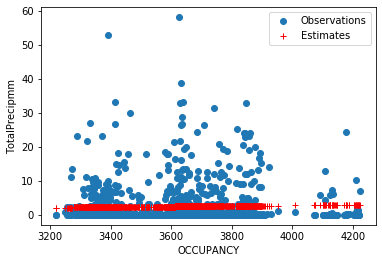

In [86]:
# Plot the estimates along the actual observations

plt.plot(merged_df.OCCUPANCY, merged_df.TotalPrecipmm, 'o', label = 'Observations')
plt.xlabel('OCCUPANCY')
plt.ylabel('TotalPrecipmm')

# Draw estimates
plt.plot(merged_df.OCCUPANCY, merged_df.y_est, 'r+', label='Estimates')

# Add legend
plt.legend()
plt.show()

In [87]:
# Show the model summary

m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          TotalPrecipmm   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.059
Date:                Sat, 08 Aug 2020   Prob (F-statistic):              0.304
Time:                        12:51:50   Log-Likelihood:                -3489.7
No. Observations:                1095   AIC:                             6983.
Df Residuals:                    1093   BIC:                             6993.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6515      3.050     -0.214      0.831      -6.636       5.333
OCCUPANCY      0.0009      0.001      1.029      0.304      -0.001       0.003
==============================================================================
Omnibus:                      913.716   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20398.280
Skew:                           3.831   Prob(JB):                         0.00
Kurtosis:                      22.707   Cond. No.                     6.24e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# No relationship. Try hypothesis #2 - negative relationship between minimum daily temperature
# and occupancy

In [89]:
# Same x, input a new y
mu_y2 = merged_df["MinTempCelsius"].mean()

print(mu_x, mu_y2)

3618.611872146119 5.844474885844754


In [90]:
# Calculate the standard deviations of the new y

sig_y2 = merged_df["MinTempCelsius"].std()

print(sig_x, sig_y2)

210.7277371415258 9.856542861126368


In [91]:
beta_1 = sig_y2/sig_x * cm.loc['OCCUPANCY', 'MinTempCelsius']
beta_0 = mu_y2 - beta_1 * mu_x

print(beta_0, beta_1)

12.316827085832891 -0.0017886284654644454


In [92]:
#Fit the regression model using the OLS method
# Initialize the regression model

m = sm.ols('MinTempCelsius ~ OCCUPANCY', data = merged_df)

In [93]:
# Fit the regression model

m = m.fit()

In [94]:
# Print the regression parameters

m.params

Intercept    12.316827
OCCUPANCY    -0.001789
dtype: float64

In [95]:
# Visualize our results.
# Calculate estimates of y2

intercept, slope = m.params
merged_df['y2_est'] = intercept + slope * merged_df.OCCUPANCY

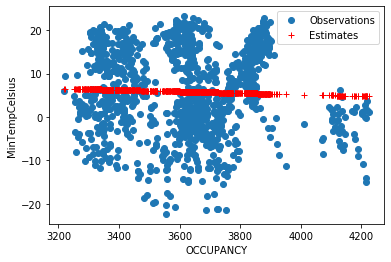

In [96]:
# Plot the estimates along the actual observations

plt.plot(merged_df.OCCUPANCY, merged_df.MinTempCelsius, 'o', label = 'Observations')
plt.xlabel('OCCUPANCY')
plt.ylabel('MinTempCelsius')

# Draw estimates
plt.plot(merged_df.OCCUPANCY, merged_df.y2_est, 'r+', label='Estimates')

# Add legend
plt.legend()
plt.show()

In [97]:
# Visually a very slight negative relationship
# Show the model summary 

m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MinTempCelsius   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.601
Date:                Sat, 08 Aug 2020   Prob (F-statistic):              0.206
Time:                        13:02:22   Log-Likelihood:                -4057.9
No. Observations:                1095   AIC:                             8120.
Df Residuals:                    1093   BIC:                             8130.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3168      5.125      2.404      0.016       2.262      22.372
OCCUPANCY     -0.0018      0.001     -1.265      0.206      -0.005       0.001
==============================================================================
Omnibus:                       67.325   Durbin-Watson:                   0.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.504
Skew:                          -0.285   Prob(JB):                     1.18e-08
Kurtosis:                       2.311   Cond. No.                     6.24e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
# No correlation at all

In [99]:
# What's the main problem? Growing capacity is driving Occupancy
# We need to de-trend this data. We'll try two methods
# 1. Statistical
# 2. Taking a sample where capacity is held constant.

# *********************************************************
# 1. Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
# We'll use additive & multiplicative decomposition then compare.
merged_df.interpolate(inplace = True)
#merged_df.index=merged_df.index.to_timestamp()
result_mul = seasonal_decompose(merged_df['OCCUPANCY'], model='multiplicative')

# And to compare, do Additive as well
# Additive model
result_add = seasonal_decompose(merged_df['OCCUPANCY'], model='additive')

<Figure size 1440x720 with 0 Axes>

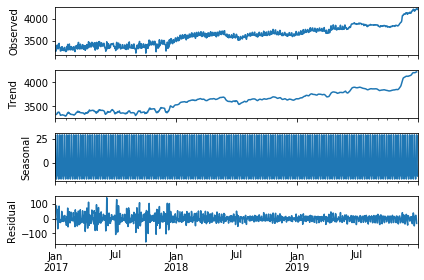

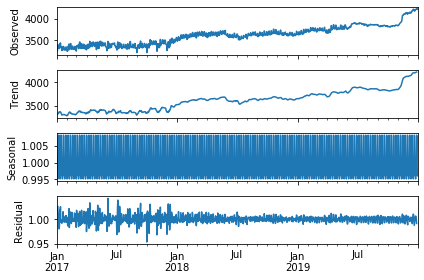

In [100]:
plt.figure(figsize=(20,10))
p1 = result_add.plot()
p2 = result_mul.plot()
#plt.figure(figsize=(20,10))
plt.show()

Text(0.5, 1.0, 'Occupancy detrended by subtracting the trend component - multiplicative method')

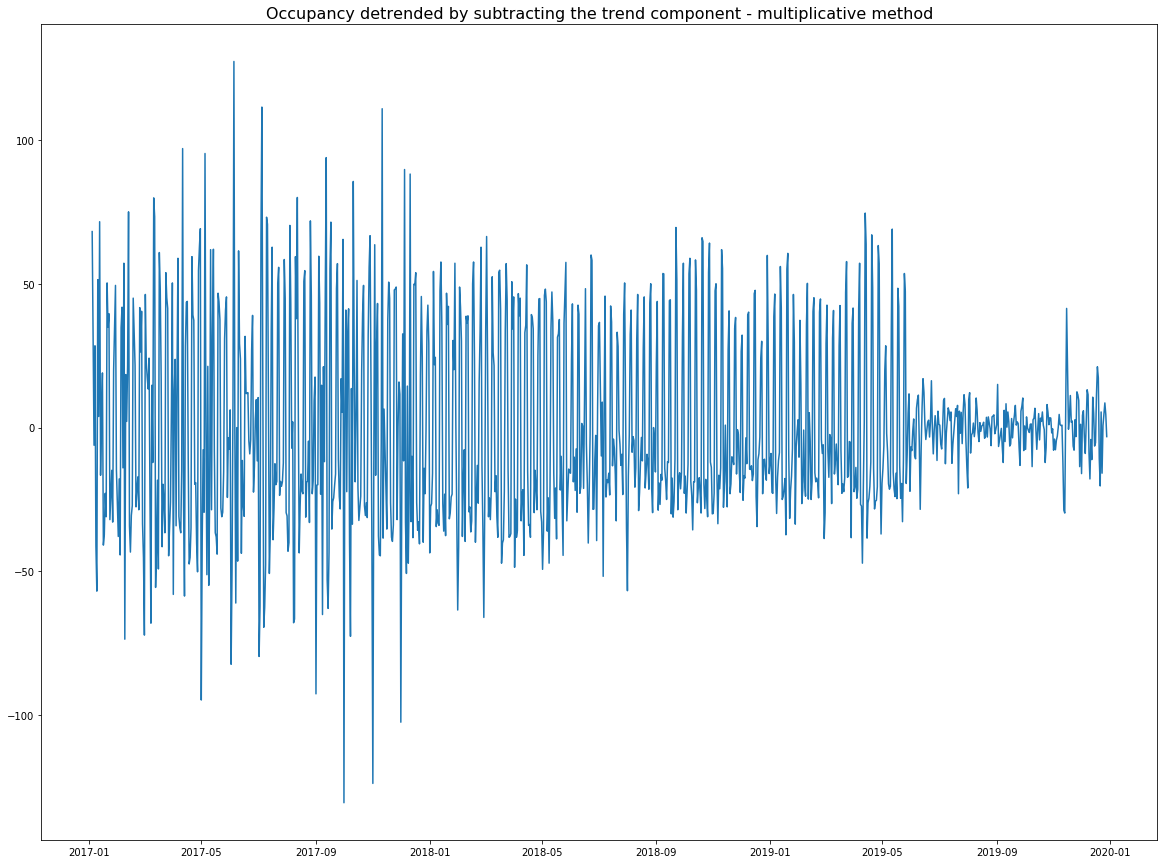

In [27]:
detrended_mul = merged_df.OCCUPANCY.values - result_mul.trend
detrended_add = merged_df.OCCUPANCY.values - result_add.trend
fig=plt.figure(figsize=(20,15))
plt.plot(detrended_mul)
#plt.figure(figsize=(20,10))
plt.title('Occupancy detrended by subtracting the trend component - multiplicative method', fontsize=16)

Text(0.5, 1.0, 'Occupancy detrended by subtracting the trend component - additive method')

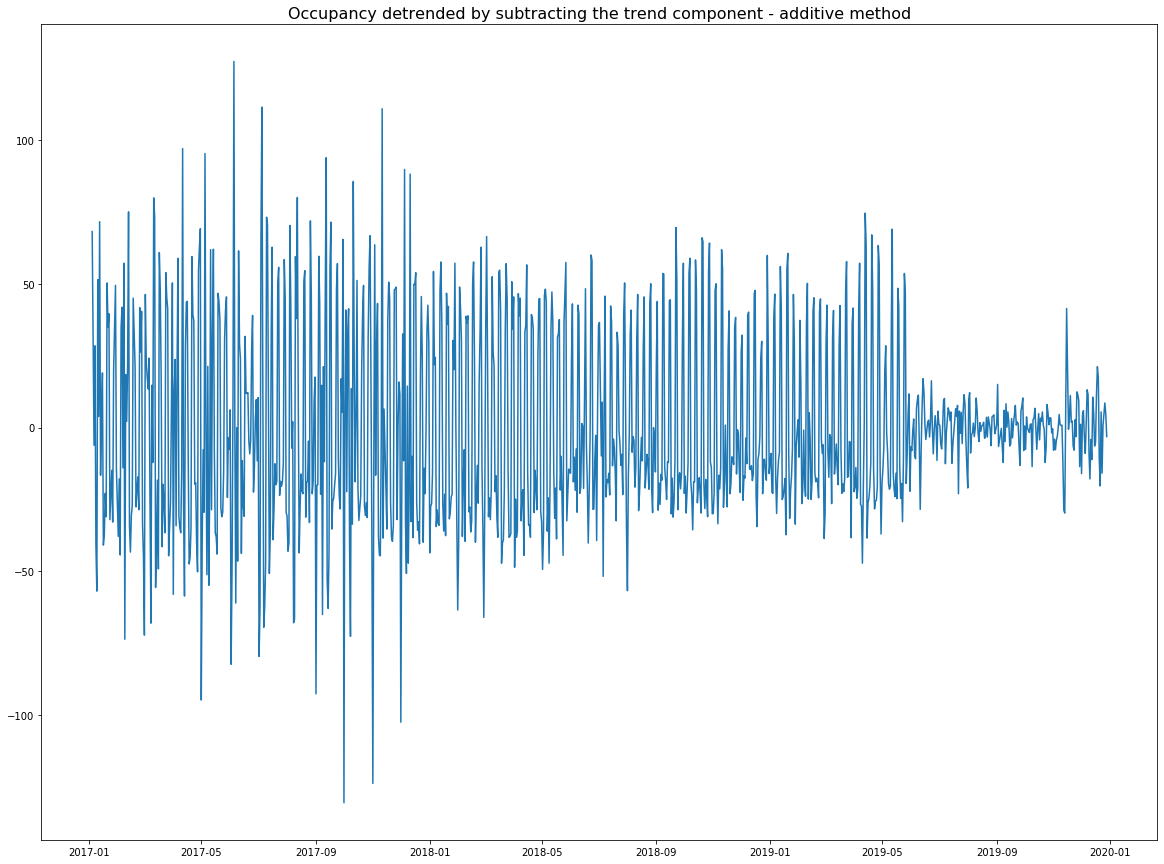

In [28]:
fig=plt.figure(figsize=(20,15))
plt.plot(detrended_add)
#plt.figure(figsize=(20,10))
plt.title('Occupancy detrended by subtracting the trend component - additive method', fontsize=16)

In [29]:
# Ok, the transformation has successfully removed the growth trend. The Occupancy though
# though it highly erratic through to May 2019 for some reason.
# Check to see if remaining noise is white noise
# Take the residuals and remove NaNs
residual1 = result_mul.resid.dropna()
residual2 = result_add.resid.dropna()

In [30]:
# Calculate means
mu1 = residual1.mean()
mu2 = residual2.mean()

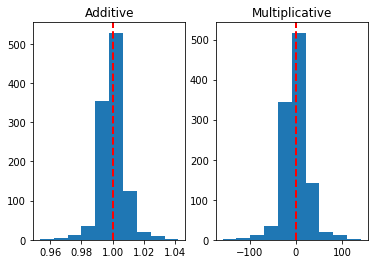

In [31]:
# Plot histograms
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(residual1)
ax2.hist(residual2)

# Add titles
ax1.set_title('Additive')
ax2.set_title('Multiplicative')

# Add vertical lines to highlight the means
ax1.axvline(x = mu1, 
            color='r', 
            linestyle='dashed', 
            linewidth=2)

ax2.axvline(x = mu2, 
            color='r', 
            linestyle='dashed', 
            linewidth=2)

plt.show()

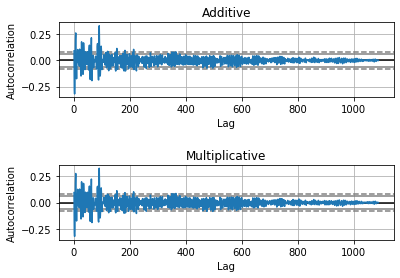

In [32]:
# Results are very similar - spread is nearly identical. 
# Assess the independence by calculating autocorrelation
fig, (ax1, ax2) = plt.subplots(2, 1)

pd.plotting.autocorrelation_plot(residual1, ax = ax1)
pd.plotting.autocorrelation_plot(residual2, ax = ax2)

# Add titles
ax1.set_title('Additive')
ax2.set_title('Multiplicative')

plt.subplots_adjust(hspace = 0.9)
plt.show()

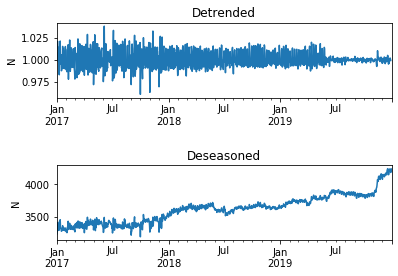

In [33]:
# Both models show similar autocorrelation. Either model could be used.
# Remove the trend from the signal a different way
merged_df['detrended'] = merged_df.OCCUPANCY / result_mul.trend
merged_df['deseasoned'] = merged_df.OCCUPANCY / result_mul.seasonal

fix, (ax1, ax2) = plt.subplots(2, 1)
merged_df['detrended'].plot(ax = ax1)
merged_df['deseasoned'].plot(ax = ax2)

ax1.set_ylabel('N')
ax2.set_ylabel('N')

ax1.set_title('Detrended')
ax2.set_title('Deseasoned')

plt.subplots_adjust(hspace = 0.9)
plt.show()


In [34]:
trend_strength = 1. - np.var(result_mul.resid) / np.var(result_mul.resid * result_mul.trend)
seasonality_strength = 1. - np.var(result_mul.resid) / np.var(result_mul.resid + result_mul.seasonal)

In [35]:
print ('Strength of trend is: %1.3f' % trend_strength)
print ('Strength of seasonality is: %1.3f' % seasonality_strength)

Strength of trend is: 1.000
Strength of seasonality is: 0.309


In [36]:
# The strength of the trend is far greater than the strength of seasonality
# So we'll use de-trended data to do OLS Regression

In [38]:
cm = merged_df.corr(method = 'pearson')
# Print correlation matrix
cm

,capacity,OCCUPANCY,vacancy,Longitude (x),Latitude (y),Climate ID,Year,Month,Day,Data Quality,...,Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),TotalPrecipmm,Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),detrended,deseasoned
capacity,1.000000e+00,9.600173e-01,-5.018454e-01,-6.494116e-15,-9.504516e-15,NaN,8.762745e-01,1.507538e-01,5.265180e-02,NaN,...,9.181870e-02,-1.137309e-02,NaN,NaN,2.687045e-02,2.079127e-01,NaN,NaN,2.591181e-02,9.640440e-01
OCCUPANCY,9.600173e-01,1.000000e+00,-7.239170e-01,-1.510143e-14,1.904776e-15,NaN,8.996592e-01,2.455493e-01,6.546114e-02,NaN,...,4.610282e-02,1.110307e-03,NaN,NaN,3.111807e-02,1.586527e-01,NaN,NaN,1.647544e-01,9.958368e-01
vacancy,-5.018454e-01,-7.239170e-01,1.000000e+00,-3.307839e-15,1.174912e-14,NaN,-6.202614e-01,-3.871768e-01,-7.250573e-02,NaN,...,8.383050e-02,-3.145852e-02,NaN,NaN,-2.992859e-02,2.217798e-02,NaN,NaN,-4.413074e-01,-7.011302e-01
Longitude (x),-6.494116e-15,-1.510143e-14,-3.307839e-15,1.000000e+00,-1.000000e+00,NaN,0.000000e+00,4.602386e-15,-9.135818e-17,NaN,...,1.591573e-15,2.529647e-17,NaN,NaN,1.740271e-16,-2.459928e-17,NaN,NaN,-5.007081e-14,-2.995047e-15
Latitude (y),-9.504516e-15,1.904776e-15,1.174912e-14,-1.000000e+00,1.000000e+00,NaN,0.000000e+00,7.264655e-16,-6.072887e-19,NaN,...,-8.911249e-16,2.874512e-17,NaN,NaN,-1.657627e-16,-3.382650e-16,NaN,NaN,5.007071e-14,3.123122e-15
Climate ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,8.762745e-01,8.996592e-01,-6.202614e-01,0.000000e+00,0.000000e+00,NaN,1.000000e+00,-1.092516e-17,4.590478e-19,NaN,...,5.319534e-02,7.582545e-03,NaN,NaN,2.828651e-02,1.963750e-01,NaN,NaN,-5.789073e-03,9.035371e-01
Month,1.507538e-01,2.455493e-01,-3.871768e-01,4.602386e-15,7.264655e-16,NaN,-1.092516e-17,1.000000e+00,-1.059205e-02,NaN,...,-2.645518e-01,1.361962e-01,NaN,NaN,-2.526075e-02,-1.988561e-01,NaN,NaN,-2.461896e-03,2.457844e-01
Day,5.265180e-02,6.546114e-02,-7.250573e-02,-9.135818e-17,-6.072887e-19,NaN,4.590478e-19,-1.059205e-02,1.000000e+00,NaN,...,-1.800360e-02,3.377134e-03,NaN,NaN,2.297620e-02,-4.589905e-02,NaN,NaN,6.860823e-02,6.568431e-02
Data Quality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Calculate the means of x, y

mu_x = merged_df["detrended"].mean()
mu_y = merged_df["TotalPrecipmm"].mean()

print(mu_x, mu_y)

1.00002056909523 2.482328767123289


In [40]:
# Calculate the standard deviations of x, y

sig_x = merged_df["detrended"].std()
#df1["x"].mean()np.std(x)
sig_y = merged_df["TotalPrecipmm"].std()

print(sig_x, sig_y)

0.009541850853523905 5.8646930416138305


In [41]:
beta_1 = sig_y/sig_x * cm.loc['detrended', 'TotalPrecipmm']
beta_0 = mu_y - beta_1 * mu_x

print(beta_0, beta_1)

-19.558948466430454 22.040823873748536


In [42]:
#Fit the regression model using the OLS method
# Initialize the regression model

m = sm.ols('TotalPrecipmm ~ detrended', data = merged_df)

In [43]:
# Fit the regression model

m = m.fit()

In [44]:
# Print the regression parameters

m.params

Intercept   -19.58326
detrended    22.05108
dtype: float64

In [45]:
# Visualize our results.
# Calculate estimates of y

intercept, slope = m.params
merged_df['y_est'] = intercept + slope * merged_df.detrended

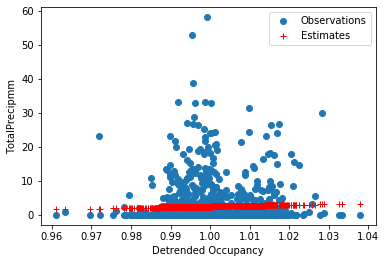

In [46]:
# Plot the estimates along the actual observations

plt.plot(merged_df.detrended, merged_df.TotalPrecipmm, 'o', label = 'Observations')
plt.xlabel('Detrended Occupancy')
plt.ylabel('TotalPrecipmm')

# Draw estimates
plt.plot(merged_df.detrended, merged_df.y_est, 'r+', label='Estimates')

# Add legend
plt.legend()
plt.show()

In [47]:
# Show the model summary

m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          TotalPrecipmm   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.400
Date:                Sat, 08 Aug 2020   Prob (F-statistic):              0.237
Time:                        12:24:03   Log-Likelihood:                -3470.9
No. Observations:                1089   AIC:                             6946.
Df Residuals:                    1087   BIC:                             6956.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.5833     18.640     -1.051      0.294     -56.158      16.991
detrended     22.0511     18.639      1.183      0.237     -14.521      58.623
==============================================================================
Omnibus:                      912.100   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20504.665
Skew:                           3.849   Prob(JB):                         0.00
Kurtosis:                      22.815   Cond. No.                         210.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

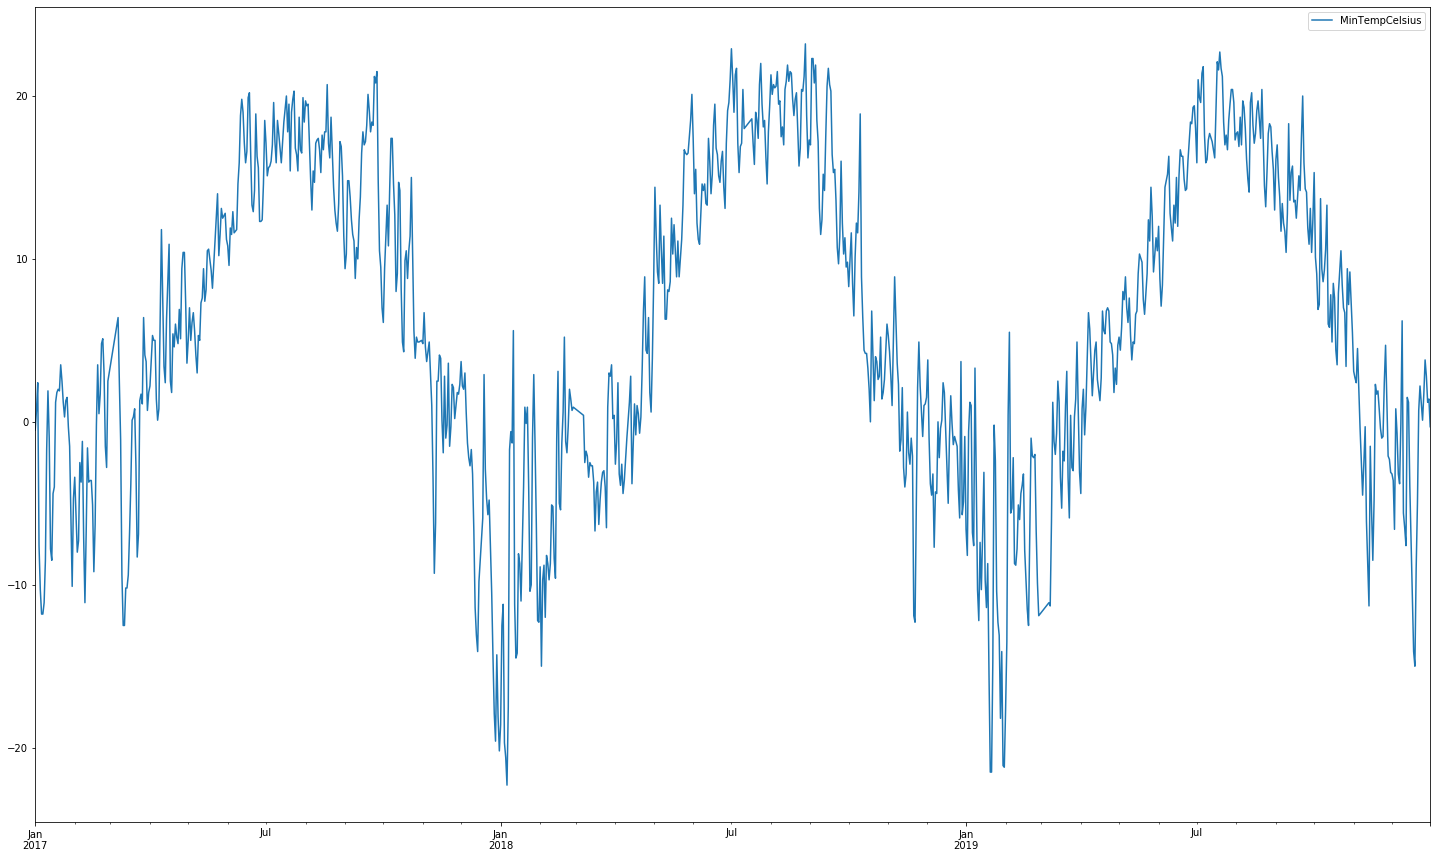

In [49]:
# The R-squared and Adjusted R-squared values show no correlation at all between Total
# Precipitation and the detrended Occupancy data.

# Let's do the same with temperature.
# Now plot temperature
axw = merged_df.plot(y='MinTempCelsius', figsize=(25,15))

In [50]:
# Same x, input a new y
mu_y2 = merged_df["MinTempCelsius"].mean()

print(mu_x, mu_y2)

1.00002056909523 5.844474885844754


In [51]:
# Calculate the standard deviations of the new y

sig_y2 = merged_df["MinTempCelsius"].std()

print(sig_x, sig_y2)

0.009541850853523905 9.856542861126368


In [52]:
beta_1 = sig_y2/sig_x * cm.loc['detrended', 'MinTempCelsius']
beta_0 = mu_y2 - beta_1 * mu_x

print(beta_0, beta_1)

28.787459685187088 -22.94251289260983


In [53]:
#Fit the regression model using the OLS method
# Initialize the regression model

m2 = sm.ols('MinTempCelsius ~ detrended', data = merged_df)

In [54]:
# Fit the regression model

m2 = m2.fit()

In [55]:
# Print the regression parameters

m2.params

Intercept    28.861175
detrended   -22.988526
dtype: float64

In [56]:
# Visualize our results.
# Calculate estimates of y2

intercept, slope = m2.params
merged_df['y2_est'] = intercept + slope * merged_df.detrended

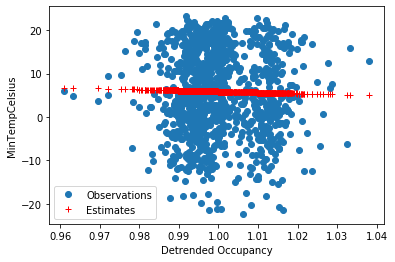

In [57]:
# Plot the estimates along the actual observations

plt.plot(merged_df.detrended, merged_df.MinTempCelsius, 'o', label = 'Observations')
plt.xlabel('Detrended Occupancy')
plt.ylabel('MinTempCelsius')

# Draw estimates
plt.plot(merged_df.detrended, merged_df.y2_est, 'r+', label='Estimates')

# Add legend
plt.legend()
plt.show()

In [58]:
# Show the model summary for Extreme Cold

m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MinTempCelsius   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5365
Date:                Sat, 08 Aug 2020   Prob (F-statistic):              0.464
Time:                        12:25:49   Log-Likelihood:                -4038.4
No. Observations:                1089   AIC:                             8081.
Df Residuals:                    1087   BIC:                             8091.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.8612     31.388      0.919      0.358     -32.727      90.450
detrended    -22.9885     31.386     -0.732      0.464     -84.573      38.596
==============================================================================
Omnibus:                       71.431   Durbin-Watson:                   0.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.029
Skew:                          -0.293   Prob(JB):                     5.52e-09
Kurtosis:                       2.296   Cond. No.                         210.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# No correlation at all.
# Last attempt - isolate the days with some precipitation (precip >= 2mm) and the tempurature is near freezing
# (-10 to +1)
NearZero_Precip = merged_df[(merged_df['TotalPrecipmm'] >= 2) & (merged_df['MinTempCelsius'] >-10) & (merged_df['MinTempCelsius'] <= 1)]

In [60]:
NearZero_Precip.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2017-01-10 to 2019-12-06
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   capacity                   53 non-null     int64  
 1   OCCUPANCY                  53 non-null     int64  
 2   vacancy                    53 non-null     int64  
 3   Longitude (x)              53 non-null     float64
 4   Latitude (y)               53 non-null     float64
 5   Station Name               50 non-null     object 
 6   Climate ID                 53 non-null     float64
 7   Year                       53 non-null     float64
 8   Month                      53 non-null     float64
 9   Day                        53 non-null     float64
 10  Data Quality               0 non-null      float64
 11  Max Temp (°C)              53 non-null     float64
 12  Max Temp Flag              0 non-null      object 
 13  MinTempCelsius             53 no

In [61]:
NearZero_Precip.head()

,capacity,OCCUPANCY,vacancy,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,...,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag,detrended,deseasoned,y_est,y2_est
2017-01-10,3547,3425,122,-79.4,43.67,TORONTO CITY,6158355.0,2017.0,1.0,10.0,...,0.5625,NaN,NaN,M,NaN,M,1.015245,3438.582562,2.803979,5.522199
2017-01-12,3647,3443,204,-79.4,43.67,TORONTO CITY,6158355.0,2017.0,1.0,12.0,...,0.4375,NaN,NaN,M,NaN,M,1.021229,3455.653116,2.935938,5.384630
2017-01-31,3543,3265,278,-79.4,43.67,TORONTO CITY,6158355.0,2017.0,1.0,31.0,...,0.0000,T,NaN,M,NaN,M,0.991970,3277.948048,2.290761,6.057236
2017-02-07,3602,3419,183,-79.4,43.67,TORONTO CITY,6158355.0,2017.0,2.0,7.0,...,0.5000,NaN,NaN,M,NaN,M,1.016997,3432.558767,2.842631,5.481904
2017-02-10,3562,3370,192,-79.4,43.67,TORONTO CITY,6158355.0,2017.0,2.0,10.0,...,0.0000,T,NaN,M,NaN,M,1.000636,3368.783769,2.481850,5.858022


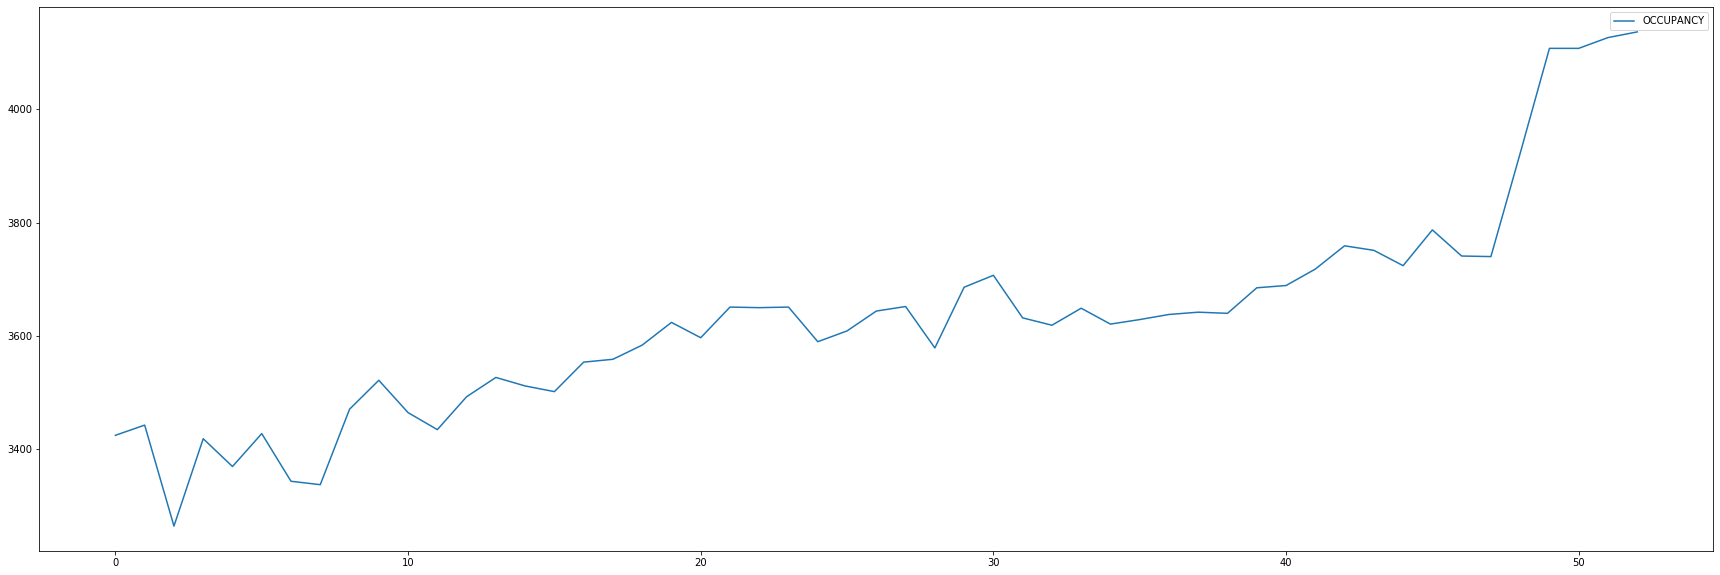

In [62]:
ax5 = NearZero_Precip.reset_index().plot(y='OCCUPANCY',figsize=(30,10))

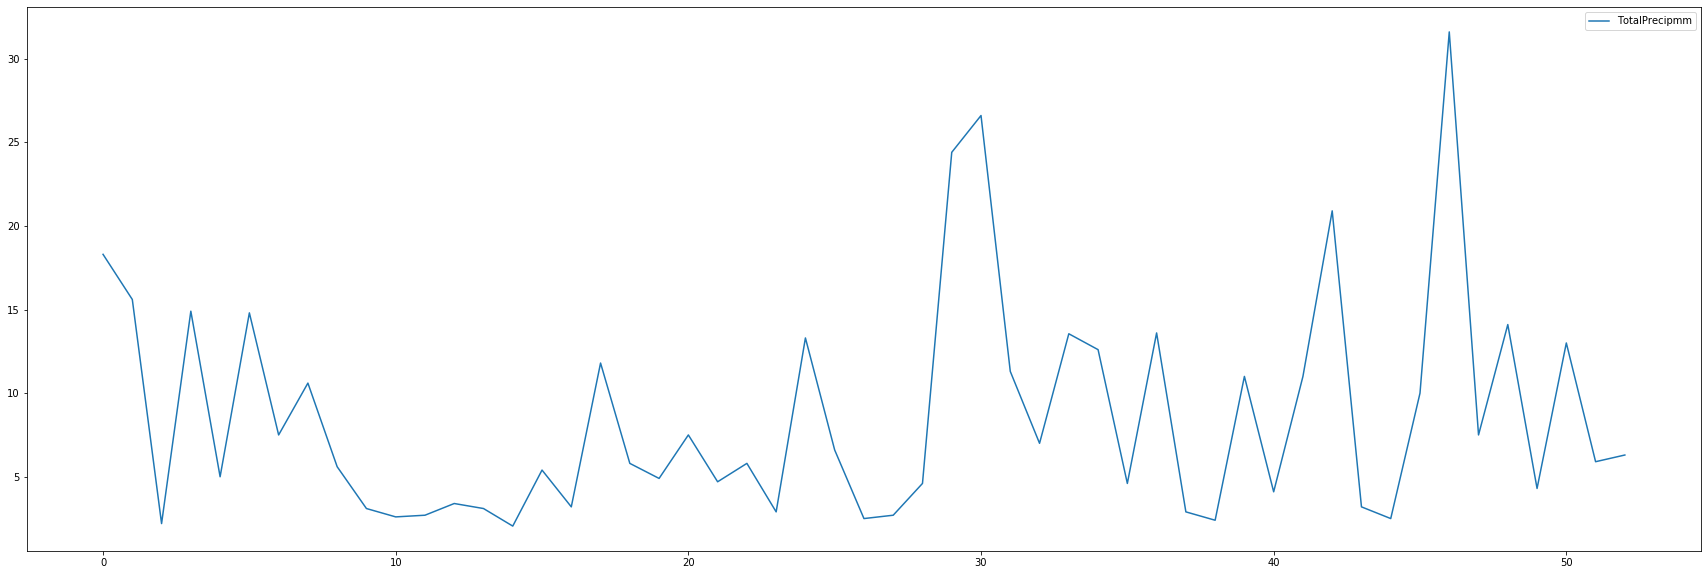

In [63]:
ax6 = NearZero_Precip.reset_index().plot(y='TotalPrecipmm',figsize=(30,10))

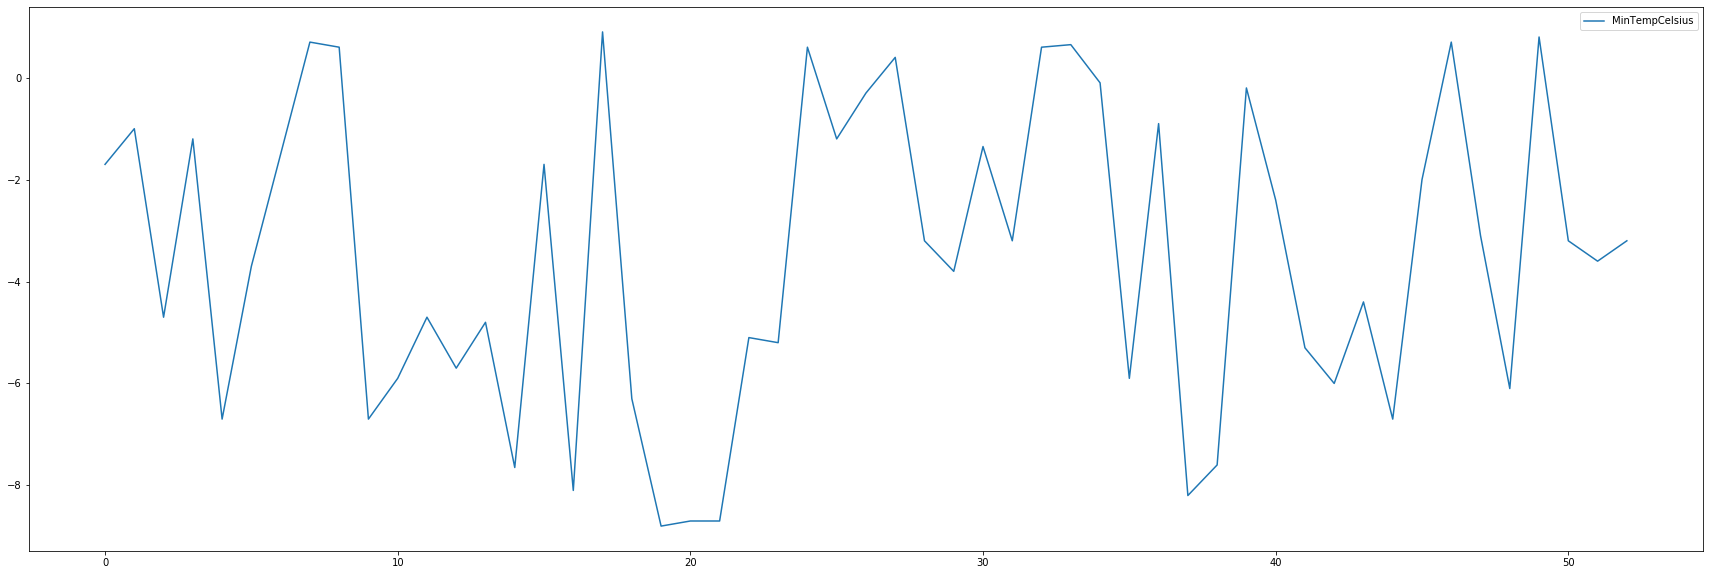

In [65]:
ax5 = NearZero_Precip.reset_index().plot(y='MinTempCelsius',figsize=(30,10))

In [66]:
# Apply multiple regression
from sklearn import linear_model
# here we have 2 variables for multiple regression.
X = NearZero_Precip[['TotalPrecipmm','MinTempCelsius']] 
Y = NearZero_Precip['OCCUPANCY']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 3599.1671457718353
Coefficients: 
 [ 3.232691   -0.66748926]


In [68]:
import statsmodels.api as sm2

model = sm2.OLS(Y, X).fit()
predictions = model.predict(X) 

In [69]:
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:              OCCUPANCY   R-squared (uncentered):                   0.835
Model:                            OLS   Adj. R-squared (uncentered):              0.828
Method:                 Least Squares   F-statistic:                              128.8
Date:                Sat, 08 Aug 2020   Prob (F-statistic):                    1.16e-20
Time:                        12:27:45   Log-Likelihood:                         -462.01
No. Observations:                  53   AIC:                                      928.0
Df Residuals:                      51   BIC:                                      932.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
# Strong R-squared & adjusted R-squared values, so there's correlation. A future study would
# delve deeper into the nature of the correlation and looking at the impact of the variables
# using either backward elimination or forward selection